## Line Of Best Fit
#### Here we will try finding line of best fit by minimizing the least square errors (difference between actual and predicted values). We will be doing this exercise without using Scipy.curve_fit function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
filename = 'DataSets//index.txt'
x,y = np.loadtxt(filename,dtype='str',usecols=(0,1),unpack=True)

In [61]:
def func_y_pred(x,m,b):
    return (m+b*x)

In [62]:
x = x.astype('int64')
y = y.astype('int64')

In [63]:
print(x.min())
print(x.max())
print(y.min())
print(y.max())

2
138
4
40


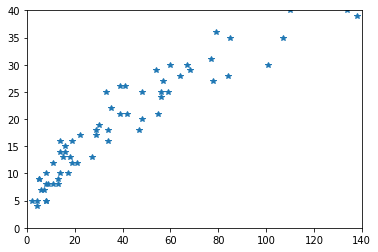

In [64]:
plt.axis(xmin=0,xmax=140,ymin=0,ymax=40)
plt.plot(x,y,'*')

In [65]:
def get_coef(x,y):
    '''
    Get slope and intercept inital values
    '''
    y_mean = np.divide(np.sum(y),len(y))
    x_mean = np.divide(np.sum(x),len(x))
    
    x_term = x-x_mean
    y_term = y-y_mean
    m_num = np.sum(x_term*y_term)
    m_den = np.sum(np.power(x_term,2))
    
    b = np.divide(m_num,m_den)
    m = y_mean-b*x_mean
    
    return m,b

In [77]:
def func_sq_err(y,y_hat):
    '''
    Function to get RMSE (Root mean square error)
    '''
    r_num = np.sum(np.power(y_hat,2))
    m = len(y)
    err = np.sqrt(np.divide(r_num,m))
    return err

def func_grad_est(x,y):
    y_hat = y-(func_y_pred(x,8.02,0.279))
    mu = np.mean(x)
    num = np.sum(np.power(y_hat,2))
    den = np.sum(np.power(x-mu,2))
    den_ = den*(len(x)-2)
    return np.sqrt(np.divide(num,den_))

In [83]:
m1,b1 = get_coef(x,y)
y_pred = func_y_pred(x,m1,b1)
y_hat = y-y_pred
err = func_sq_err(y,y_hat)
print("m : ",m1)
print("b : ",b1)
print("rmse : ",err)

m :  8.024522686506431
b :  0.27901864457713266
rmse :  3.462911400777285


In [58]:
from scipy import optimize
result = optimize.minimize_scalar(func_y_pred,args=(1,0.2))

C:\Users\yjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1921: RuntimeWarning: invalid value encountered in double_scalars
  if numpy.abs(x - xmid) < (tol2 - 0.5 * (b - a)):


In [80]:
func_grad_est(x,y)

0.013492355874951905

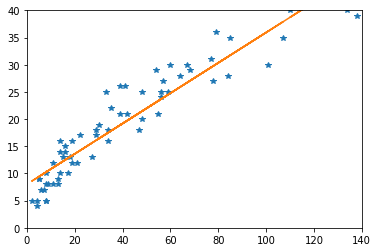

In [84]:
plt.axis(xmin=0,xmax=140,ymin=0,ymax=40)
plt.plot(x,y,'*')
plt.plot(x,y_pred)

In [92]:
optimize.minimize?

In [90]:
def func_err(x,y,m,b):
    return y - (m+b*x)

In [91]:
optimize.minimize(func_err,x0=0,args=(1,1))

TypeError: func_err() missing 1 required positional argument: 'b'